In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy.language import Language
from textblob import TextBlob
!pip install googletrans==3.1.0a0
from googletrans import Translator

# generate country code  based on country name 
!pip install pycountry

!pip install geopandas
from shapely.geometry import Point 
import folium
import geopandas as gpd
!pip install mapclassify
import mapclassify

# plot world map
from geopandas import GeoDataFrame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 1.4 MB 15.3 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=25c3370831ec9733b9e77c8df0291d47ffd5facf3200bbdd8e5e8ff6b59254d0
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filen

In [84]:
path = "/content/cleaned_license1.csv"
license1 = pd.read_csv(path)

In [85]:
license1.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments
0,0,Spain,2022-10-12 11:38:56,1.0,#UCLGCongress,[],0.0,0.0
1,1,"Katy, Texas, united states",2022-10-13 18:44:40,1.0,NaN,[],40.0,0.0
2,2,NaN,2022-10-15 16:33:21,1.0,Dado que el Día Mundial de la Alimentación es ...,[],9.0,0.0
3,3,NaN,2022-10-05 16:11:46,1.0,Milkman 730,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc...",143.0,0.0
4,4,"Dallas, USA",2022-10-15 18:21:50,1.0,NaN,[],22.0,0.0


In [86]:
license2 = pd.read_csv("/content/cleaned_license2.csv")
license3 = pd.read_csv("/content/cleaned_license3.csv")
license4 = pd.read_csv("/content/cleaned_license4.csv")
license5 = pd.read_csv("/content/cleaned_license5.csv")
license6 = pd.read_csv("/content/cleaned_license6.csv")
license9 = pd.read_csv("/content/cleaned_license9.csv")
license10 = pd.read_csv("/content/cleaned_license10.csv")

In [87]:
license2.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments
0,0,NaN,2022-10-20 17:39:29,2.0,NaN,[],0.0,0.0
1,1,NaN,2022-10-20 09:48:27,2.0,NaN,[],0.0,0.0
2,2,NaN,2022-07-21 14:37:10,2.0,NaN,[],0.0,0.0
3,3,"YORK, ENGLAND",2022-10-20 18:55:34,2.0,NaN,[],0.0,0.0
4,4,NaN,2022-10-19 18:51:15,2.0,NaN,[],81.0,0.0


In [88]:
merged1_2 = license2.append(license1, ignore_index=True)

In [89]:
merged1_2

,Unnamed: 0,location,dates,license,description,tags,views,comments
0,0,NaN,2022-10-20 17:39:29,2.0,NaN,[],0.0,0.0
1,1,NaN,2022-10-20 09:48:27,2.0,NaN,[],0.0,0.0
2,2,NaN,2022-07-21 14:37:10,2.0,NaN,[],0.0,0.0
3,3,"YORK, ENGLAND",2022-10-20 18:55:34,2.0,NaN,[],0.0,0.0
4,4,NaN,2022-10-19 18:51:15,2.0,NaN,[],81.0,0.0
...,...,...,...,...,...,...,...,...
6929,3397,NaN,2022-07-19 16:49:31,1.0,NaN,[],18.0,0.0
6930,3398,NaN,2022-10-12 08:53:30,1.0,NaN,[],1.0,0.0
6931,3399,Brasil,2022-09-29 16:21:18,1.0,NaN,"['19ª Legislatura', 'Câmara Municipal', 'Câmar...",20.0,0.0
6932,3400,NaN,2022-09-24 23:21:16,1.0,NaN,[],10.0,0.0


In [95]:
merged_all = merged1_2.append(license3, ignore_index=True).append(license4, ignore_index=True).append(
    license5, ignore_index=True).append(license6, ignore_index=True).append(
        license9, ignore_index=True).append(license10, ignore_index=True)

In [96]:
merged_all

,Unnamed: 0,location,dates,license,description,tags,views,comments
0,0,NaN,2022-10-20 17:39:29,2.0,NaN,[],0.0,0.0
1,1,NaN,2022-10-20 09:48:27,2.0,NaN,[],0.0,0.0
2,2,NaN,2022-07-21 14:37:10,2.0,NaN,[],0.0,0.0
3,3,"YORK, ENGLAND",2022-10-20 18:55:34,2.0,NaN,[],0.0,0.0
4,4,NaN,2022-10-19 18:51:15,2.0,NaN,[],81.0,0.0
...,...,...,...,...,...,...,...,...
33569,7818,NaN,2022-10-08 19:10:58,9.0,NaN,[],14.0,0.0
33570,7819,NaN,2022-10-08 19:15:37,9.0,NaN,[],35.0,0.0
33571,7820,NaN,2022-10-08 19:15:48,9.0,NaN,[],31.0,0.0
33572,7821,NaN,2022-10-08 19:32:26,9.0,NaN,[],17.0,0.0


In [99]:
# First drop NaN in "location"
merged_all_cleaned = merged_all.dropna(subset=["location"])

In [100]:
merged_all_cleaned

,Unnamed: 0,location,dates,license,description,tags,views,comments
3,3,"YORK, ENGLAND",2022-10-20 18:55:34,2.0,NaN,[],0.0,0.0
7,7,"Zofingen, Schweiz",2022-10-18 11:30:16,2.0,18. Oktober 2022; Bern; WorldSkills 2022 SE - ...,"['WorldSkills', 'Special', 'Edition', 'Carross...",64.0,0.0
10,10,"Melbourne, Australia",2022-10-17 20:37:32,2.0,,[],26.0,0.0
13,13,"Newtown, Pa, USA",2022-10-14 14:46:26,2.0,NaN,"['Day One', 'vacation', 'Pennsylvania', 'Kane']",91.0,0.0
14,14,"Norfolk, UK",2022-10-14 11:07:51,2.0,NaN,[],11.0,0.0
...,...,...,...,...,...,...,...,...
33547,7796,"Vancouver, Canada",2022-10-11 13:27:50,9.0,2022-10-11 Walking to and from the Apple Store...,"['2022-10-11', 'sonyrx10iv', 'sonyrx10ivphoto'...",73.0,0.0
33550,7799,Israel,2022-10-05 16:32:19,9.0,NaN,"['Colombia', 'Gang', 'crime', 'pistol', 'weapon']",316.0,4.0
33557,7806,"Archydal, Canada",2022-09-13 18:05:37,9.0,An annotation on a hotel.,"['annotation', 'note']",128.0,0.0
33558,7807,"Archydal, Canada",2022-09-11 15:52:45,9.0,NaN,[],60.0,0.0


## Map:

In [102]:
Country = []
for row in merged_all_cleaned["location"][0:]:
  location_list = str(row).split(",")
  country = location_list[len(location_list) - 1]
  country = country.rstrip() # remove the last whitespace
  country = country.lstrip() # remove the first whitespace
  country = country.title()
  if country == "Usa":
    country = "United States"
  if country == "Uk":
    country = "United Kingdom"
  Country.append(country)
print(Country)

['England', 'Schweiz', 'Australia', 'United States', 'United Kingdom', 'Switzerland', 'Germany', 'Germany', 'Switzerland', 'United States', 'Australia', 'Switzerland', 'Or', 'Taiwan', 'Midland/Odessa', 'United States', 'Midland/Odessa', 'England', 'United States', 'Bangkok', 'United States', 'United States', 'United States', 'United Kingdom', 'England', 'Schweiz', 'United Kingdom', 'Taiwan', 'Taiwan', 'Taiwan', 'United States', 'United States', 'United States', 'United Kingdom', 'United States', 'United Kingdom', 'Brasil', 'United States', 'Belgium', 'Taiwan', 'U.S.A.', 'United States', 'Brasil', 'Brasil', 'España', '台灣', 'United Kingdom', 'Brasil', 'United States', 'England', 'Canada', 'Spain', 'Germany', 'United States', 'France', 'Austria', 'United States', 'Finland', 'Australia', 'United States', 'United States', 'Brasil', 'Brasil', 'Netherlands', 'United Kingdom', 'Taiwan', 'Brasil', 'Brasil', 'United States', 'Switzerland', 'United States', 'Switzerland', 'United States', 'United

In [104]:
merged_all_cleaned["country"] = Country

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's check some random:

In [107]:
merged_all_cleaned["country"][3532]

'Spain'

In [108]:
merged_all_cleaned.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments,country
3,3,"YORK, ENGLAND",2022-10-20 18:55:34,2.0,NaN,[],0.0,0.0,England
7,7,"Zofingen, Schweiz",2022-10-18 11:30:16,2.0,18. Oktober 2022; Bern; WorldSkills 2022 SE - ...,"['WorldSkills', 'Special', 'Edition', 'Carross...",64.0,0.0,Schweiz
10,10,"Melbourne, Australia",2022-10-17 20:37:32,2.0,,[],26.0,0.0,Australia
13,13,"Newtown, Pa, USA",2022-10-14 14:46:26,2.0,NaN,"['Day One', 'vacation', 'Pennsylvania', 'Kane']",91.0,0.0,United States
14,14,"Norfolk, UK",2022-10-14 11:07:51,2.0,NaN,[],11.0,0.0,United Kingdom


Source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

In [109]:
import pycountry
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [113]:
# Translate the locations with non-English names to English first:
def translate(df):
  count = 0
  text1 = []
  translator = Translator()
  for row in df["country"][0:]:
    # print(translator.detect(row).lang)
    if translator.detect(row).lang != "en" and row != "nan" and row != "":
      text1.append(translator.translate(row, dest='en').text)
      count += 1
      print("translate", count)
    else:
      text1.append(row)
      count += 1
      print(count)
  df["country"] = text1

In [ ]:
translate(merged_all_cleaned)

In [116]:
merged_all_cleaned["Alpha-3 code"] = alpha3code(merged_all_cleaned.country)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
url = "https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
map_df = pd.read_csv(url)

In [118]:
for col in map_df.columns:
    map_df[col] = map_df[col].str.extract(r'"(.*)"')

In [119]:
map_df

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,NaN,AF,AFG,4,33,65
1,NaN,AL,ALB,8,41,20
2,NaN,DZ,DZA,12,28,3
3,NaN,AS,ASM,16,-14.3333,-170
4,NaN,AD,AND,20,42.5,1.6
...,...,...,...,...,...,...
251,NaN,WF,WLF,876,-13.3,-176.2
252,NaN,EH,ESH,732,24.5,-13
253,NaN,YE,YEM,887,15,48
254,NaN,ZM,ZMB,894,-15,30


In [120]:
merged2 = pd.merge(merged_all_cleaned, map_df, on="Alpha-3 code")
merged2.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments,country,Alpha-3 code,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
0,7,"Zofingen, Schweiz",2022-10-18 11:30:16,2.0,18. Oktober 2022; Bern; WorldSkills 2022 SE - ...,"['WorldSkills', 'Special', 'Edition', 'Carross...",64.0,0.0,Switzerland,CHE,NaN,CH,756,47,8
1,15,Switzerland,2022-10-14 11:29:29,2.0,NaN,[],143.0,0.0,Switzerland,CHE,NaN,CH,756,47,8
2,26,Switzerland,2022-10-13 10:41:31,2.0,NaN,[],73.0,0.0,Switzerland,CHE,NaN,CH,756,47,8
3,33,Switzerland,2022-11-10 14:12:59,2.0,NaN,[],276.0,0.0,Switzerland,CHE,NaN,CH,756,47,8
4,70,"Zofingen, Schweiz",2022-09-28 15:13:28,2.0,NaN,"['carrosserie suisse', 'Carrosserie', 'Fahrzeu...",22.0,0.0,Switzerland,CHE,NaN,CH,756,47,8


In [122]:
merged2.shape

(11237, 15)

In [123]:
merged2_grouped = merged2.groupby("Alpha-3 code")["Alpha-3 code"].count()

In [124]:
merged2_grouped.shape

(77,)

In [125]:
merged2_grouped

Alpha-3 code
AND       1
ARE       1
ARG      25
ARM       2
AUS     230
       ... 
UKR     853
URY      11
USA    2448
YEM       2
ZAF     286
Name: Alpha-3 code, Length: 77, dtype: int64

In [126]:
merged_for_map = pd.DataFrame()

In [127]:
merged_for_map["Alpha-3 code"] = list(merged2_grouped.index)
merged_for_map["Count"] = list(merged2_grouped)

In [128]:
sum = sum(list(merged2_grouped))

In [129]:
all_percent = []
for each_count in list(merged2_grouped):
  each_percent = each_count/sum
  all_percent.append(each_percent)

In [130]:
merged_for_map["Percent"] = all_percent

In [131]:
merged_for_map

,Alpha-3 code,Count,Percent
0,AND,1,0.000089
1,ARE,1,0.000089
2,ARG,25,0.002225
3,ARM,2,0.000178
4,AUS,230,0.020468
...,...,...,...
72,UKR,853,0.075910
73,URY,11,0.000979
74,USA,2448,0.217852
75,YEM,2,0.000178


In [132]:
# merged_for_map2 = merged_for_map.merge(map_df, on="Alpha-3 code")
merged_for_map2 = merged_for_map.set_index("Alpha-3 code").join(map_df.set_index("Alpha-3 code"))

In [133]:
merged_for_map2.head()

,Count,Percent,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
Alpha-3 code,,,,,,,
AND,1,0.000089,NaN,AD,20,42.5,1.6
ARE,1,0.000089,NaN,AE,784,24,54
ARG,25,0.002225,NaN,AR,32,-34,-64
ARM,2,0.000178,NaN,AM,51,40,45
AUS,230,0.020468,NaN,AU,36,-27,133


In [134]:
merged_for_map2["Alpha-3 code"] = list(merged_for_map2.index)
merged_for_map2.reset_index(drop=True, inplace=True)

In [136]:
merged_for_map2.head()

,Count,Percent,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average),Alpha-3 code
0,1,0.000089,NaN,AD,20,42.5,1.6,AND
1,1,0.000089,NaN,AE,784,24,54,ARE
2,25,0.002225,NaN,AR,32,-34,-64,ARG
3,2,0.000178,NaN,AM,51,40,45,ARM
4,230,0.020468,NaN,AU,36,-27,133,AUS


In [135]:
merged_for_map2.shape

(77, 8)

In [137]:
geometry_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [138]:
geometry_data.head(1)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."


In [139]:
new = merged_for_map2.set_index("Alpha-3 code").join(geometry_data.set_index("iso_a3"))

In [140]:
new.shape

(77, 12)

In [141]:
new.head()

,Count,Percent,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average),pop_est,continent,name,gdp_md_est,geometry
AND,1,0.000089,NaN,AD,20,42.5,1.6,NaN,NaN,NaN,NaN,None
ARE,1,0.000089,NaN,AE,784,24,54,6072475.0,Asia,United Arab Emirates,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
ARG,25,0.002225,NaN,AR,32,-34,-64,44293293.0,South America,Argentina,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
ARM,2,0.000178,NaN,AM,51,40,45,3045191.0,Asia,Armenia,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
AUS,230,0.020468,NaN,AU,36,-27,133,23232413.0,Oceania,Australia,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


In [153]:
new = new.sort_values(by='Count',ascending=False)

In [161]:
new["name"][6] = "France"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
geometry_data.shape

(177, 6)

In [163]:
new_geo = GeoDataFrame(new) 

In [164]:
new_geo = new_geo.sort_values(by='Count',ascending=False)

In [165]:
new_geo.head(10)

,Count,Percent,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average),pop_est,continent,name,gdp_md_est,geometry
USA,2448,0.217852,NaN,US,840,38,-97,326625791.0,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
CAN,1731,0.154045,NaN,CA,124,60,-95,35623680.0,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
ROU,1722,0.153244,NaN,RO,642,46,25,21529967.0,Europe,Romania,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."
UKR,853,0.075910,NaN,UA,804,49,32,44033874.0,Europe,Ukraine,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."
GBR,528,0.046988,NaN,GB,826,54,-2,64769452.0,Europe,United Kingdom,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."
ESP,388,0.034529,NaN,ES,724,40,-4,48958159.0,Europe,Spain,1690000.0,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890..."
FRA,362,0.032215,NaN,FR,250,46,2,NaN,NaN,France,NaN,None
BRA,313,0.027854,NaN,BR,76,-10,-55,207353391.0,South America,Brazil,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
ZAF,286,0.025452,NaN,ZA,710,-29,24,54841552.0,Africa,South Africa,739100.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
ECU,253,0.022515,NaN,EC,218,-2,-77.5,16290913.0,South America,Ecuador,182400.0,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911..."


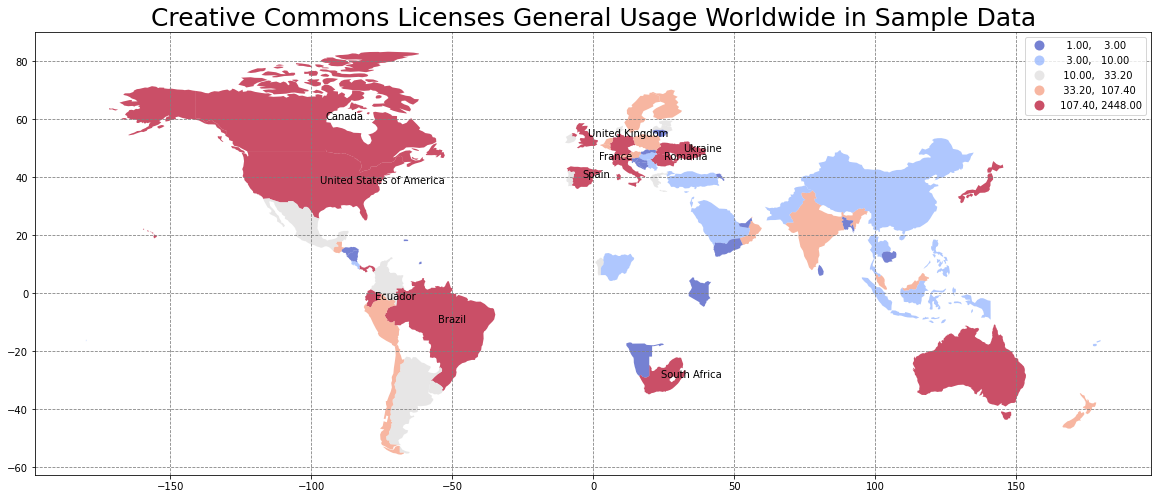

<Figure size 432x288 with 0 Axes>

In [187]:
new_geo.plot(column='Count', legend=True, 
             scheme="quantiles",
            figsize=(20, 20), cmap='coolwarm', alpha=0.7)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(new_geo["Longitude (average)"][i]),float(new_geo["Latitude (average)"][i]), new_geo["name"][i], size=10)
    # "{}\n{}".format(final_for_map_geo["country"][i],final_for_map_geo["Count"][i])
plt.grid(color='gray', linestyle='dashed')
plt.title('Creative Commons Licenses General Usage Worldwide in Sample Data',fontsize=25)
plt.show()
plt.savefig('licenses_location_distribution.png', dpi=300, bbox_inches='tight')

In [42]:
coun = []
for country in license1["country"]:
  if country != "In":
    coun.append(country)
print(coun)

In [43]:
# list(pycountry.countries)

['Spain', 'United States', 'United States', 'Portugal', 'Taiwan', 'United States', 'United States', 'spain', 'Indonesia', 'The Netherlands', 'United States', 'Canada', 'Brasilia', 'Russia', 'Il', 'Taiwan', 'Russia', 'United States', 'Spain', 'United States', 'United States', 'United States', 'Switzerland', 'Canada', 'Brazil', 'Brazil', 'United States', 'Brazil', 'United States', 'Brazil', 'Belgium', 'Germany', 'United States', 'spain', 'United Kingdom', 'Nicaragua', 'United States', 'United States', 'St. Paul Mn & Sometimes Manchester/Salford Uk', 'Brazil', 'Taiwan', 'Brazil', 'United States', 'The Netherlands', 'Taiwan', 'England', 'United States', 'United States', 'Oxon', 'United States', 'Peru', 'United States', 'The Netherlands', 'Italia', 'Japan', 'United States', 'United States', 'India', 'United States', 'Belgium', 'Hong Kong', 'Italia', 'Russia', 'The Netherlands', 'Brazil', 'Rio de Janeiro', 'France', 'Japan', 'United States', 'United States', 'Brazil', 'United States', 'Itali

In [44]:
license1.head()

,Unnamed: 0,location,dates,license,description,tags,views,comments,country,Alpha-3 code
0,0,Spain,2022-10-12 11:38:56,1.0,#UCLGCongress,[],0.0,0.0,Spain,ESP
1,1,"Katy, Texas, united states",2022-10-13 18:44:40,1.0,NaN,[],40.0,0.0,United States,USA
2,2,NaN,2022-10-15 16:33:21,1.0,Dado que el Día Mundial de la Alimentación es ...,[],9.0,0.0,In,None
3,3,NaN,2022-10-05 16:11:46,1.0,Milkman 730,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc...",143.0,0.0,In,None
4,4,"Dallas, USA",2022-10-15 18:21:50,1.0,NaN,[],22.0,0.0,United States,USA


In [45]:
merged2.shape

(944, 15)

In [46]:
count = 0
a = []
for country in license1["country"]:
  if country != "nan":
    count += 1

In [47]:
license1.shape

(3402, 10)

In [48]:
count

3402

NameError: ignored

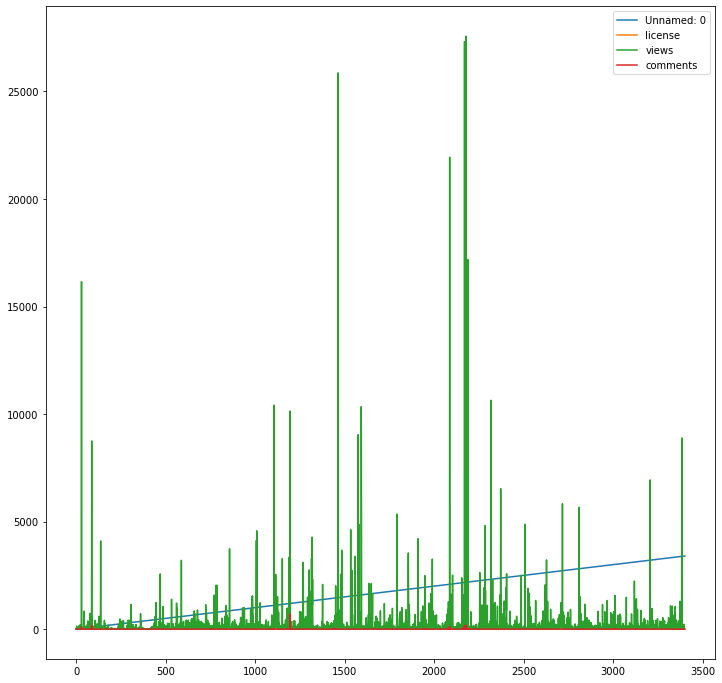

In [49]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(12,12))
license1.plot(ax=ax)
cities.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.savefig('overlay_map.png')
plt.show()

## EDA and Cleaning:

In [ ]:
path = "/content/license1.csv"
license1_raw = pd.read_csv(path)

In [ ]:
for col in license1_raw.columns:  # to get the column list
  if "Unnamed" in col:
    license1_raw = license1_raw.drop(col, axis=1)

In [ ]:
license1_raw.head()

,id,dateuploaded,isfavorite,license,realname,location,title,description,dates,views,comments,tags
0,5.244026e+10,1.666246e+09,0.0,1.0,UCLG,Spain,NaN,#UCLGCongress,2022-10-12 11:38:56,0.0,0.0,[]
1,5.244050e+10,1.666211e+09,0.0,1.0,Qui Le,"Katy, Texas, united states",Valentino Oct 13 2022,NaN,2022-10-13 18:44:40,40.0,0.0,[]
2,5.244023e+10,1.666203e+09,0.0,1.0,NaN,NaN,Día mundial de la alimentación en América Lati...,Dado que el Día Mundial de la Alimentación es ...,2022-10-15 16:33:21,9.0,0.0,[]
3,5.243891e+10,1.666172e+09,0.0,1.0,NaN,NaN,L1008730,Milkman 730,2022-10-05 16:11:46,143.0,0.0,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc..."
4,5.243849e+10,1.666151e+09,0.0,1.0,Jan Xie,"Dallas, USA",I30A3278,NaN,2022-10-15 18:21:50,22.0,0.0,[]


In [ ]:
license1_raw.shape

(61930, 12)

In [ ]:
count = 0
for arr in pd.unique(license1_raw["id"]):
  count += 1

In [ ]:
count

3402

In [ ]:
new_license1 = license1.dropna()

In [ ]:
new_license1.shape

(10720, 8)

In [ ]:
license1_raw.shape

(61930, 12)

In [ ]:
new_license1_raw = license1_raw.drop_duplicates(subset="id")

In [ ]:
new_license1_raw.shape

(3402, 12)

In [ ]:
new_license1_raw

,id,dateuploaded,isfavorite,license,realname,location,title,description,dates,views,comments,tags
0,5.244026e+10,1.666246e+09,0.0,1.0,UCLG,Spain,NaN,#UCLGCongress,2022-10-12 11:38:56,0.0,0.0,[]
1,5.244050e+10,1.666211e+09,0.0,1.0,Qui Le,"Katy, Texas, united states",Valentino Oct 13 2022,NaN,2022-10-13 18:44:40,40.0,0.0,[]
2,5.244023e+10,1.666203e+09,0.0,1.0,NaN,NaN,Día mundial de la alimentación en América Lati...,Dado que el Día Mundial de la Alimentación es ...,2022-10-15 16:33:21,9.0,0.0,[]
3,5.243891e+10,1.666172e+09,0.0,1.0,NaN,NaN,L1008730,Milkman 730,2022-10-05 16:11:46,143.0,0.0,"['Edinburgh', 'Scotland', 'ScotlandisNow', 'Sc..."
4,5.243849e+10,1.666151e+09,0.0,1.0,Jan Xie,"Dallas, USA",I30A3278,NaN,2022-10-15 18:21:50,22.0,0.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
61799,5.223885e+10,1.658687e+09,0.0,1.0,NaN,NaN,2022-07-19 15.49.31,NaN,2022-07-19 16:49:31,18.0,0.0,[]
61807,5.242332e+10,1.665588e+09,0.0,1.0,Sri Sainathuni Sarath Babuji Sannidhanam,NaN,IMG_4934,NaN,2022-10-12 08:53:30,1.0,0.0,[]
61836,5.239369e+10,1.664482e+09,0.0,1.0,Câmara de Vereadores Itajaí,Brasil,20220929_0034©Davi Spuldaro-CVI,NaN,2022-09-29 16:21:18,20.0,0.0,"['19ª Legislatura', 'Câmara Municipal', 'Câmar..."
61846,5.238501e+10,1.664171e+09,0.0,1.0,Gabis-Schlager.Club / Eventfotografie,NaN,DSC_2397,NaN,2022-09-24 23:21:16,10.0,0.0,[]


In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(new_license1_raw["Dates"], new_license1_raw["Counts"])
plt.xticks(rotation=60)



---



---



## NLP and SVM:

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
merged1_2 = license2.append(license1, ignore_index=True)

In [ ]:
merged1_2

In [ ]:
type(license1["description"][2])

In [ ]:
type(merged1_2["license"][6933])

In [ ]:
# Remove NaN rows in description
import math
for i in np.arange(len(merged1_2['description'])):
  if type(merged1_2['description'][i]) == float and math.isnan(merged1_2['description'][i]):
    merged1_2.replace(merged1_2['description'][i],np.NaN)
  # Colab cannot use drop() to drop rows for some reason........
merged1_2.dropna(inplace=True)

In [ ]:
# Remove NaN rows in license
import math
for i in list(merged1_2.index):
  if math.isnan(merged1_2['license'][i]):
    merged1_2.replace(merged1_2['license'][i],np.NaN)
  # Colab cannot use drop() to drop rows for some reason........
merged1_2.dropna(inplace=True)

In [ ]:
merged1_2

In [ ]:
copy_merged1_2 = merged1_2

In [ ]:
copy_merged1_2

In [ ]:
# Translate non-English text to English
translator = Translator()
for i in (list(merged1_2.index)):
  temp_each_new_description = ""
  if translator.detect(merged1_2['description'][i][0]).lang != "en":
    for j in np.arange(len(merged1_2['description'][i])):
        temp_each_new_description += translator.translate(merged1_2['description'][i][j], dest='en').text
  merged1_2.replace(merged1_2['description'][i], temp_each_new_description)

In [ ]:
merged1_2

In [ ]:
copy_merged1_2 = merged1_2

In [ ]:
# Change all the text to lower case
merged1_2['description'] = [entry.lower() for entry in merged1_2['description']]

In [ ]:
merged1_2

In [ ]:
# # Remove "#"
# for i in np.arange(len(merged1_2['description'])):
#   if merged1_2['description'][i][0] == "#":
#     merged1_2['description'][i] = merged1_2['description'][i][1:]

In [ ]:
# Tokenization : In this each entry in the dataset will be broken into set of words
merged1_2['description'] = [word_tokenize(entry) for entry in merged1_2['description']]

In [ ]:
merged1_2

Inspired and changed based on: https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34 

In [ ]:
# Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for (index,entry) in zip(merged1_2.index, list(merged1_2['description'])):
  # Declaring Empty List to store the words that follow the rules for this step
  Final_words = []
  # Initializing WordNetLemmatizer()
  word_Lemmatized = WordNetLemmatizer()
  # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
  for word, tag in pos_tag(entry):
      # Below condition is to check for Stop words and consider only alphabets
      if word not in stopwords.words('english') and word.isalpha():
          word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
          Final_words.append(word_Final)
  # The final processed set of words for each iteration will be stored in 'text_final'
  merged1_2.loc[index,'text_final'] = str(Final_words)

In [ ]:
merged1_2

In [ ]:
merged1_2.tail(50)

In [ ]:
# Now make the datasets ordered ramdonly
index = list(merged1_2.index)
# Now shuffle and update the index
import random
random.shuffle(index)
# reindex
shuffled_merged1_2 = merged1_2.reindex(index)

In [ ]:
shuffled_merged1_2

In [ ]:
list(shuffled_merged1_2["license"])

In [ ]:
# Now split the train and test datatsets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(shuffled_merged1_2['text_final'],shuffled_merged1_2['license'],test_size=0.3)

In [ ]:
Test_Y

In [ ]:
type(shuffled_merged1_2['license'][2208])

In [ ]:
math.isnan(shuffled_merged1_2["license"][2208])

Word vectorization: https://en.wikipedia.org/wiki/Tf%E2%80%93idf 

In [ ]:
# Word vectorization: turning a collection of text documents into numerical feature vectors
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(shuffled_merged1_2['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
# We can print out all the final keywords (text_final column) and their corresponding numerical values
print(Tfidf_vect.vocabulary_)

In [ ]:
# Use SVM to Predict the outcome
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

## Some random attempt using Spacy:

In [ ]:
# Load the large English NLP model
nlp = spacy.load("en_core_web_sm")

In [ ]:
text1 = ""
translator = Translator()
for row in license1["description"][0:]:
  if type(row) != float and not math.isnan(row) and row != "":
    text1 += translator.translate(row, dest='en').text
    text1 += " "

In [ ]:
text1

'#UCLGCongress Since World Food Day is a date to raise awareness about the importance of healthy diets, in Venezuela it was celebrated not only on October 16, but for a whole week. This is how, on the 14th, the Obelisk in Plaza Francia de Altamira was lit, one of the most emblematic, well-known and visited squares in Caracas. Staff from FAO Venezuela, the Chacao Mayor\'s Office (municipality where the plaza is located) and other passers-by were present there. The act was headed by Alexis Bonte, Representative of the FAO Venezuela and the Secretary of Government of the mayor\'s office, José Manuel Muñoz. The act was enlivened by a musical group, who delighted the attendees with a wide repertoire of traditional and universal songs.\n\nOn October 16, it was the turn of Mérida, in this Andean city the FAO lit the Plaza de Las Banderas, where personnel from FAO Venezuela and the Libertador Municipality were present, which is where this square is located.\n\n\nPhoto: ©FAO Milkman 730 Colorid

In [ ]:
doc = nlp(text1)

In [ ]:
for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")

Streaming output truncated to the last 5000 lines.
un (ORG)
La (GPE)
Edad Moderna (PERSON)
1824 (CARDINAL)
un (ORG)
clausurado (GPE)
1837.​ (CARDINAL)
La (PERSON)
los siglos XVI (ORG)
XVII (ORG)
el siglo XVI (ORG)
el siglo (ORG)
el siglo XVIII (ORG)
de Imón (ORG)
Pastor de Togneri (ORG)
Edad Media (PERSON)
las relaciones (GPE)
el catastro del marqués de la Ensenada​ (ORG)
un (ORG)
de renovación (PERSON)
el reinado de Carlos III (ORG)
​ El (PERSON)
del territorio (GPE)
Corona (GPE)
1796 (DATE)
el obispo (GPE)
Juan Díaz de la Guerra (ORG)
un (ORG)
el marqués de Brioso (ORG)
La (GPE)
de los (PERSON)
el 25 de febrero de 1805.​ El (ORG)
Sigüenza (NORP)
1862 (DATE)
ya contaba (PERSON)
1860.​ (CARDINAL)
Esta llegada (PERSON)
Guerra Civil


En 1936 (ORG)
Guerra Civil el bando republicano (ORG)
el 25 de julio—​ mantuvo (FAC)
Feliciano Benito (PERSON)
700 (CARDINAL)
de la CNT y (PERSON)
un (ORG)
del POUM.​ (PERSON)
Nieto Martín (PERSON)
el día 27 de julio.​ En agosto de 1936 (ORG)
comienzos de s

Reference: https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e 

In [ ]:
# Replace a token with "REDACTED" if it is a name
def replace_name_with_placeholder(token):
  if token.ent_iob != 0 and token.ent_type_ == "PERSON":
    return "[REDACTED]"
  else:
    return token.text

# Loop through all the entities in a document and check if they are names
def scrub(text):
  doc = nlp(text)
  with doc.retokenize() as retokenizer:
    for ent in doc.ents:
      retokenizer.merge(ent)
  tokens = map(replace_name_with_placeholder, doc)
  return "".join(tokens)

In [ ]:
text1

'#UCLGCongress Since World Food Day is a date to raise awareness about the importance of healthy diets, in Venezuela it was celebrated not only on October 16, but for a whole week. This is how, on the 14th, the Obelisk in Plaza Francia de Altamira was lit, one of the most emblematic, well-known and visited squares in Caracas. Staff from FAO Venezuela, the Chacao Mayor\'s Office (municipality where the plaza is located) and other passers-by were present there. The act was headed by Alexis Bonte, Representative of the FAO Venezuela and the Secretary of Government of the mayor\'s office, José Manuel Muñoz. The act was enlivened by a musical group, who delighted the attendees with a wide repertoire of traditional and universal songs.\n\nOn October 16, it was the turn of Mérida, in this Andean city the FAO lit the Plaza de Las Banderas, where personnel from FAO Venezuela and the Libertador Municipality were present, which is where this square is located.\n\n\nPhoto: ©FAO Milkman 730 Colorid

In [ ]:
cleaned_doc = scrub(text1)

In [ ]:
text1

'#UCLGCongress Since World Food Day is a date to raise awareness about the importance of healthy diets, in Venezuela it was celebrated not only on October 16, but for a whole week. This is how, on the 14th, the Obelisk in Plaza Francia de Altamira was lit, one of the most emblematic, well-known and visited squares in Caracas. Staff from FAO Venezuela, the Chacao Mayor\'s Office (municipality where the plaza is located) and other passers-by were present there. The act was headed by Alexis Bonte, Representative of the FAO Venezuela and the Secretary of Government of the mayor\'s office, José Manuel Muñoz. The act was enlivened by a musical group, who delighted the attendees with a wide repertoire of traditional and universal songs.\n\nOn October 16, it was the turn of Mérida, in this Andean city the FAO lit the Plaza de Las Banderas, where personnel from FAO Venezuela and the Libertador Municipality were present, which is where this square is located.\n\n\nPhoto: ©FAO Milkman 730 Colorid

In [ ]:
cleaned_doc

'#UCLGCongress SinceWorld Food Dayisadatetoraiseawarenessabouttheimportanceofhealthydiets,inVenezuelaitwascelebratednotonlyonOctober 16,butfora whole week.Thisishow,onthe 14th,theObeliskinPlaza Francia de Altamirawaslit,oneofthemostemblematic,well-knownandvisitedsquaresinCaracas.StafffromFAO Venezuela,theChacaoMayor\'sOffice(municipalitywheretheplazaislocated)andotherpassers-bywerepresentthere.Theactwasheadedby[REDACTED],RepresentativeoftheFAOVenezuelaandtheSecretaryofGovernmentofthemayor\'soffice,[REDACTED].Theactwasenlivenedbyamusicalgroup,whodelightedtheattendeeswithawiderepertoireoftraditionalanduniversalsongs.\n\nOnOctober 16,itwastheturnofMérida,inthisAndeancitytheFAOlitthe Plaza de Las Banderas,wherepersonnelfromFAO Venezuelaandthe Libertador Municipalitywerepresent,whichiswherethissquareislocated.\n\n\nPhoto:©FAOMilkman730[REDACTED]openingatOctober 10 2020 <ahref="http://www.oxonraces.com/photos/download.php?myidlc=2022-10-15-oxford&frameid=0607"rel="noreferrer[REDACTED]hereify

In [ ]:
for entity in cleaned_doc.ents:
    print(f"{entity.text} ({entity.label_})")

AttributeError: ignored